In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

G = const.G.cgs.value
M = const.M_sun.cgs.value
au = const.au.cgs.value

$$
\begin{align*}
    \Delta t &\leq \frac{1}{2}\frac{(\Delta z)^2}{D} \\
        &\leq \frac{1}{2} \frac{(0.1 H)^2}{\alpha c_s H} \\
        &\leq \frac{1}{2} \frac{10^{-2} H^2}{\alpha c_s H} \\
        &\leq \frac{1}{200} \frac{H}{\alpha c_s} \\
        &\leq \frac{1}{200}\frac{1}{\alpha\Omega} \qquad &\left[H = \frac{c_s}{\Omega}\right] \\
        &\leq \frac{1}{200}\frac{r^{3/2}}{\alpha(GM)^{1/2}} \qquad &\left[\Omega = \left(\frac{GM}{r^3}\right)^{1/2}\right]
\end{align*}
$$

$$
\boxed{
     \Delta t \leq \frac{1}{200}\frac{r^{3/2}}{\alpha\left(GM\right)^{1/2}}
}
$$

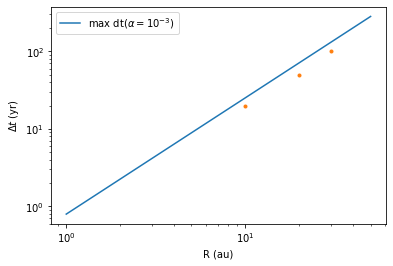

In [27]:
def max_dt(r,alpha,M=M):
    return (1/200)*r**(3/2)/(alpha*(G*M)**(1/2))

rs = np.arange(1,51)*au
alpha = 1e-3

fig,ax = plt.subplots()

ax.loglog(rs/au,max_dt(rs,alpha)/3.15e7,label='max dt($\\alpha=10^{-3}$)')
ax.loglog(my_dts.keys(),my_dts.values(),'.')
ax.legend()
ax.set(xlabel='R (au)',ylabel='$\\Delta t$ (yr)')

plt.show()

In [39]:
def print_dict(d):
    for k in d.keys():
        print(f'{k:>3d} au : {d[k]:>3.0f} yrs')

In [40]:
key_rs = [10,20,30,40,50,75,100]
dt_dict = {}
for r in key_rs:
    dt_dict[r] = max_dt(r*au,alpha)/3.15e7
print_dict(dt_dict)

 10 au :  25 yrs
 20 au :  71 yrs
 30 au : 131 yrs
 40 au : 202 yrs
 50 au : 282 yrs
 75 au : 518 yrs
100 au : 797 yrs


In [41]:
my_dts = {}

my_dts[10]=20
my_dts[20]=50
my_dts[30]=100

print_dict(my_dts)

 10 au :  20 yrs
 20 au :  50 yrs
 30 au : 100 yrs


In [42]:
def calc_ct(dt):
    return 5*dt

my_cts = {}
for r in my_dts:
    my_cts[r] = calc_ct(my_dts[r])

print_dict(my_cts)

 10 au : 100 yrs
 20 au : 250 yrs
 30 au : 500 yrs
